<a href="https://colab.research.google.com/github/fifaak/TYPT_2024/blob/main/TYPT_Invent_Yourself_(material_audio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TYPT_2024/
%cp -av ข้อ_1 /content/dataset

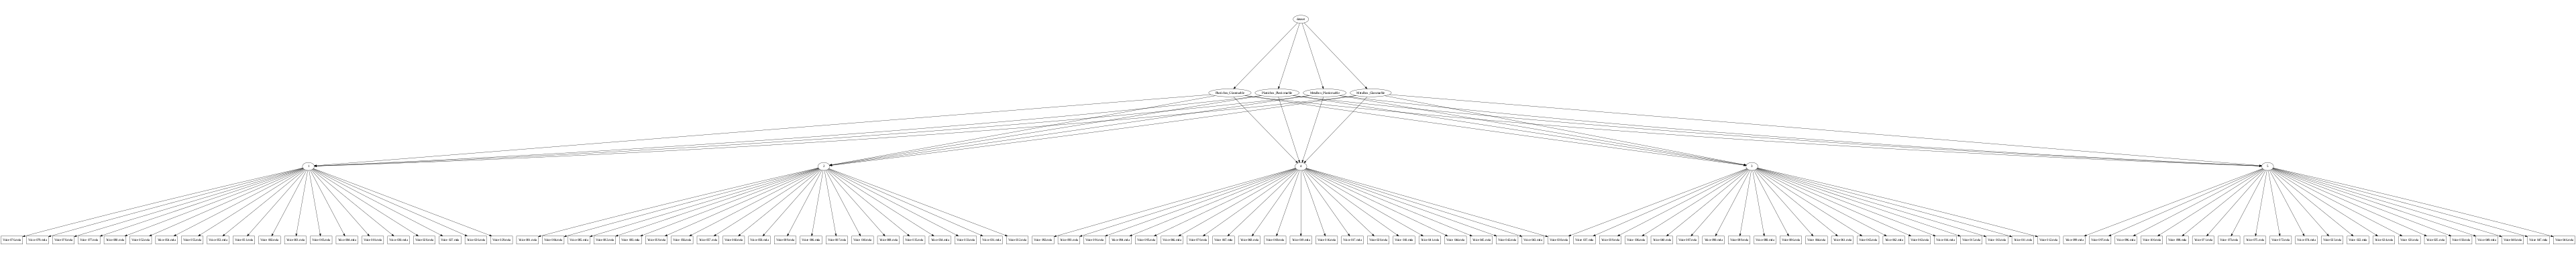

In [3]:
import os
from graphviz import Digraph
from IPython.display import display, Image

def generate_directory_tree(directory_path, graph=None, parent=None):
    if graph is None:
        graph = Digraph(comment='Directory Tree', format='png')

    current_dir = os.path.basename(directory_path)

    # Add the current directory as a node
    graph.node(current_dir)

    # Recursively add subdirectories and files
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isdir(item_path):
            # Add subdirectory and edge
            graph.node(item)
            graph.edge(current_dir, item)
            # Recursively call for subdirectory
            generate_directory_tree(item_path, graph, current_dir)
        elif os.path.isfile(item_path):
            # Add file as a node
            graph.node(item, shape='box')
            # Add edge from the current directory to the file
            graph.edge(current_dir, item)

    return graph

# Specify the directory path
directory_path = '/content/dataset'

# Create the directory tree graph
directory_tree_graph = generate_directory_tree(directory_path)

# Set the graph attributes for size and ratio
directory_tree_graph.attr(size='40,80')  # Adjust the size as needed
directory_tree_graph.attr(ratio='0.1:1.5')   # You can experiment with different ratios

# Save the graph as an image
image_path = '/content/dataset_tree'
directory_tree_graph.render(image_path, format='png', cleanup=True)

# Display the image
Image(image_path + ".png")


### Preparing data

## Training model

In [ ]:
!pip install tensorflow

In [19]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 7s (6,600 B/s)
Selecting previously unselected package tree.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [17]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 18.4 MB/s eta 0:00:00


In [18]:
# %cd ข้อ_1
!tree
# %ls

/bin/bash: line 1: tree: command not found


In [2]:
!pip install pydub
from pydub import AudioSegment

def convert_m4a_to_wav(input_path, output_path):
    # Load the M4A file
    audio = AudioSegment.from_file(input_path, format="m4a")

    # Export as WAV
    audio.export(output_path, format="wav")

In [3]:
# Get subfolder names in each parent folder
import os
import shutil

# Set the path to your directory
directory_path = "/content/dataset/"
parent_folder = []
for root, dirs, files in os.walk(directory_path):
    if dirs and os.path.basename(root)!="":
        parent_folder.append(os.path.basename(root))
import os
import shutil

# Set the path to your directory
for i  in parent_folder:
  directory_path = "/content/dataset/"+i

  # Move files from subdirectories to parent directories
  for root, dirs, files in os.walk(directory_path):
      for file in files:
          source_path = os.path.join(root, file)
          destination_path = os.path.join(directory_path, file)
          shutil.move(source_path, destination_path)

  # Remove empty subdirectories
  for root, dirs, files in os.walk(directory_path, topdown=False):
      for dir in dirs:
          dir_path = os.path.join(root, dir)
          if not os.listdir(dir_path):
              os.rmdir(dir_path)


In [ ]:
import os
from pydub import AudioSegment

def convert_m4a_to_wav(input_path, output_path):
    # Load the M4A file
    audio = AudioSegment.from_file(input_path, format="m4a")

    # Export as WAV
    audio.export(output_path, format="wav")

def batch_convert_m4a_to_wav(input_folder):
    # List all files in the input folder
    files = os.listdir(input_folder)

    for file in files:
        if file.endswith(".m4a"):
            input_path = os.path.join(input_folder, file)
            output_path = os.path.join(input_folder, os.path.splitext(file)[0] + ".wav")

            # Convert the M4A file to WAV
            convert_m4a_to_wav(input_path, output_path)
            os.remove(input_path)

            print(f"Converted {file} to {os.path.basename(output_path)}")
for i  in parent_folder:

  input_folder = "/content/dataset/"+i

  batch_convert_m4a_to_wav(input_folder)


In [24]:
%cd dataset
!ls

/content/dataset
Metalbox_Glassmarble  Metalbox_Plasticmarble  Plasticbox_Glassmarble  Plasticbox_Plasticmarble


In [ ]:
!tree

In [5]:
!pip install librosa tensorflow

In [6]:
import os
import librosa
import numpy as np

data_path = '/content/dataset'  # Replace with your data path

audio_files = []
labels = []
for root, _, files in os.walk(data_path):
    for file in files:
        if file.endswith('.wav'):
            audio_path = os.path.join(root, file)
            class_label = root.split('/')[-1]  # Extract class from folder name
            audio_files.append(audio_path)
            labels.append(class_label)

# Convert labels to numerical indices for model training
label_to_index = {label: i for i, label in enumerate(set(labels))}
labels_numerical = [label_to_index[label] for label in labels]


In [33]:
import numpy as np

def extract_features(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    # Transpose and print shape for inspection
    mfccs_T = mfccs.T
    # print(mfccs_T.shape)  # Check for consistency
    return mfccs_T

X_list = [extract_features(file) for file in audio_files]

# Find maximum length for padding
max_length = max(len(x) for x in X_list)

# Pad shorter MFCCs with zeros
X = np.stack([np.pad(x, ((0, max_length - len(x)), (0, 0)), mode='constant') for x in X_list])



In [8]:
X.ndim  # Should now have consistent shape

3

In [10]:
X.shape

(100, 108, 30)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, labels_numerical, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
np.array(y_train).shape

(80, 108, 30)


(80,)

In [37]:
from tensorflow.keras import models, layers
import numpy as np

# model = models.Sequential([
#     layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(4, activation='softmax')  # 4 classes
# ])
model = models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])


y_train = np.array(y_train)
y_val = np.array(y_val)

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
3/3 [==============================] - 2s 221ms/step - loss: 101.7594 - accuracy: 0.2375 - val_loss: 38.2218 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 51.7535 - accuracy: 0.4625 - val_loss: 21.2994 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 32.0711 - accuracy: 0.5375 - val_loss: 13.3088 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 22.1800 - accuracy: 0.6250 - val_loss: 18.7723 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 48ms/step - loss: 18.3467 - accuracy: 0.6125 - val_loss: 7.8240 - val_accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 49ms/step - loss: 7.8915 - accuracy: 0.7375 - val_loss: 8.2576 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 47ms/step - loss: 17.4514 - accuracy: 0.6500 - val_loss: 9.2289 - val_accuracy: 0.7000
Epoch 8/

In [40]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('\nTest accuracy:', test_acc*100,"%")


1/1 - 0s - loss: 7.9057 - accuracy: 0.8000 - 44ms/epoch - 44ms/step

Test accuracy: 80.0000011920929 %
